# (1)
# PCA


In [1]:
! pip install prompt-toolkit

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
d1=pd.read_csv("Iris_train.csv").iloc[:,1:]
d3=pd.read_csv("Iris_test.csv").iloc[:,1:]
Ytrain=np.array(d1['Species'])
Ytest=np.array(d3['Species'])
d2=d1.drop(['Species'],axis=1)
d4=d3.drop(['Species'],axis=1)
attributetrain=d2.to_numpy()
attributetest=d4.to_numpy()
arr1=attributetrain.T
arr2=attributetest.T
Originaltrain = np.array(attributetrain, copy=True)
Originaltest = np.array(attributetest, copy=True)
for i in range(len(arr1)):
    arr1[i]=arr1[i]-np.mean(arr1[i])
    arr2[i]=arr2[i]-np.mean(arr2[i])
C1=np.dot(arr1,arr1.T)/120
C2=np.dot(arr2,arr2.T)/30
evaluetrain,evectortrain=np.linalg.eig(C1)
evaluetest,evectortest=np.linalg.eig(C2)
evectortrain = evectortrain.T
evectortest = evectortest.T
Top1train = evectortrain[:1]
Top1test= evectortest[:1]
reduceddatatrain=np.dot(Originaltrain,Top1train.T)
reduceddatatest=np.dot(Originaltest,Top1test.T)
reduceddatatrain=reduceddatatrain.T
df=pd.DataFrame(np.array([reduceddatatrain[0],Ytrain]).T,columns=['attribute','Species'])
setosa= df.groupby('Species').get_group('Iris-setosa') 
versicolor=df.groupby('Species').get_group('Iris-versicolor') 
virginica=df.groupby('Species').get_group('Iris-virginica') 
reduceddatatrain








[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


array([[2.27387823, 3.10097517, 6.4169098 , 2.87767955, 2.49368662,
        7.01783865, 6.42196404, 2.92710098, 2.76082962, 2.83989642,
        6.90671429, 6.29669572, 6.70997325, 2.86447423, 2.98182916,
        5.30230866, 6.93508838, 7.39552814, 6.38954571, 8.40480334,
        5.86731684, 8.88626687, 6.15154307, 2.80536313, 8.98947784,
        5.72755712, 2.84989664, 2.71932158, 3.27994684, 4.98532541,
        6.87918388, 3.1350467 , 2.98391599, 3.18698859, 5.84853746,
        2.89973689, 5.82303583, 8.97502332, 2.65137327, 6.13284988,
        6.83784215, 2.88906535, 6.6597943 , 6.90671429, 5.75658923,
        6.07964548, 7.39056884, 5.67534941, 3.20763042, 4.78799318,
        7.29398518, 2.78658376, 2.62359037, 5.42379401, 7.0473177 ,
        2.81789713, 7.07661105, 2.86378809, 3.08377762, 6.60667608,
        4.5851017 , 7.916747  , 6.87152299, 7.27360916, 8.56466301,
        5.65817999, 2.60522981, 2.26763285, 6.7929612 , 8.10347906,
        2.74574703, 2.84105943, 2.51085605, 6.78

# Bayes classifier

In [2]:
Irissetosa=setosa['attribute']
Irisversicolor=versicolor['attribute']      
Irisvirginica=virginica['attribute']
Classes=[Irissetosa,Irisversicolor,Irisvirginica]
PriorS=len(setosa.axes[0])/len(df.axes[0])
Priorve=len(versicolor.axes[0])/len(df.axes[0])
Priorvi=len(virginica.axes[0])/len(df.axes[0])
Prior=[PriorS,Priorve,Priorvi]




## Classification

In [3]:


Predicted=[]

for i in range(len(reduceddatatest)):
    val=[]
    l=[]
    posterior=[]
    Total=0
    val.append(reduceddatatest[i])
    for j in range(3):      
        likelihood = pow(math.e,-pow((reduceddatatest[i][0] - np.mean(Classes[j]))/np.std(Classes[j]),2)/2)/np.std(Classes[j])
        l.append(likelihood)     
    for k in range(3):
        p=((l[k])*(Prior[k]))
        posterior.append(p)
    if max(posterior)==posterior[0]:
        val.append("Iris-setosa")
    elif max(posterior)==posterior[1]:
        val.append("Iris-versicolor")
    elif max(posterior)==posterior[2]:
        val.append("Iris-virginica") 
    Predicted.append(val)

Predicted

    

[[array([6.48301376]), 'Iris-versicolor'],
 [array([3.37868613]), 'Iris-setosa'],
 [array([9.36080695]), 'Iris-virginica'],
 [array([6.37861702]), 'Iris-versicolor'],
 [array([6.89723943]), 'Iris-virginica'],
 [array([3.16280886]), 'Iris-setosa'],
 [array([5.39146286]), 'Iris-versicolor'],
 [array([7.49805426]), 'Iris-virginica'],
 [array([6.50033072]), 'Iris-versicolor'],
 [array([5.6978117]), 'Iris-versicolor'],
 [array([7.23523399]), 'Iris-virginica'],
 [array([2.77633974]), 'Iris-setosa'],
 [array([2.94861334]), 'Iris-setosa'],
 [array([2.89124567]), 'Iris-setosa'],
 [array([2.98882916]), 'Iris-setosa'],
 [array([6.66764342]), 'Iris-versicolor'],
 [array([7.91950226]), 'Iris-virginica'],
 [array([5.60206016]), 'Iris-versicolor'],
 [array([6.20280538]), 'Iris-versicolor'],
 [array([7.72622741]), 'Iris-virginica'],
 [array([2.93311512]), 'Iris-setosa'],
 [array([6.85919897]), 'Iris-virginica'],
 [array([3.10197824]), 'Iris-setosa'],
 [array([7.68965285]), 'Iris-virginica'],
 [array([

# Confusion matrix


In [4]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
predicted=np.array(Predicted).T
CM=confusion_matrix(Ytest,predicted[1])
CM



C:\Users\Nani Panyu\AppData\Local\Temp\ipykernel_30736\215439264.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predicted=np.array(Predicted).T


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

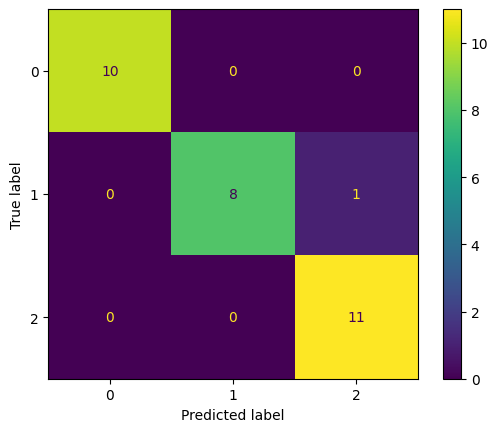

In [5]:
ConfusionMatrixDisplay(CM).plot()

# Accuracy

In [6]:
count=0
for i in range(len(Ytest)):
    if predicted[1][i]==Ytest[i]:
        count+=1
print("Accuracy is:",(count/len(Ytest))*100)        

Accuracy is: 96.66666666666667
